# Chapter 5. Support Vector Machine

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

SVM is a very powerful and versatile machine learning model:    
선형 또는 비선형 분류, 회귀 분석 및 특이치 검출 가능

SVMs은 복잡하지만 소규모 또는 중간 규모의 데이터셋 분류에 특히 적합

## 1. Linear SVM Classification

the **fundamental idea behind SVMs** is:
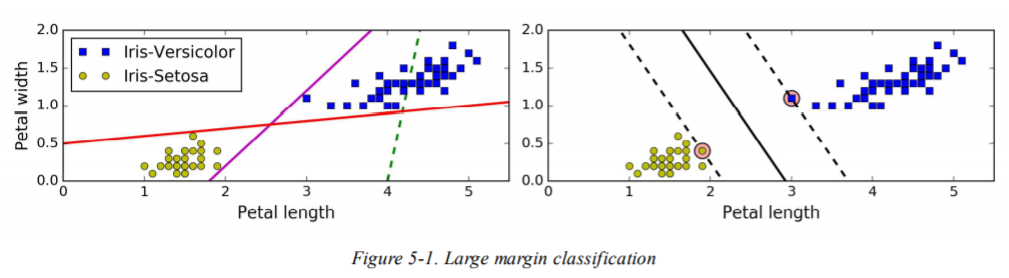

* two classes는 straing line으로 명확하게 분리될 수 있다. 
* left plot : 
    - 3개의 linear classifiers의 decision boundaries가 가능하다
    - decision boundary가 daches line으로 표현되는 model은 class를 제대로 분리하지 못할 정도로 불량한 model이다.
    - the other two models work perfectly on this trainig set
        + but 그들의 decision boundaries는 instance에 너무 가깝게 위치하고 있다 
        + 이러한 model은 new instance에 대해 잘 작동하지 못할 것

* in contrast, right plot:
    - the solid line(실선)은  decision boundary of an SVM classifier을 나타냄;
        + 이 선은 two classes를 나눌뿐만 아니라  not only separate the two classes 가능한 가장 가까운 trainig instance로 부터 멀리 떨어져있다. 
        
you can think of     
**"SVM  classifier는 classes 사이에 가능한 가장 넓은 street(거리, represented by the parallel dashed lines)를 가지는 것에 적합하다"**    
this is called **large margin classification**


> **note**
> adding more training instances "off the street(외부)"는 decision boundary에 전혀 영향을 미치지 않을 것이다:
> * 따라서 street의 가장자리에 위치한 instance에 의해 완전히 결정된다.
> * These instance are called the *support vector*

> **WARNING**   
 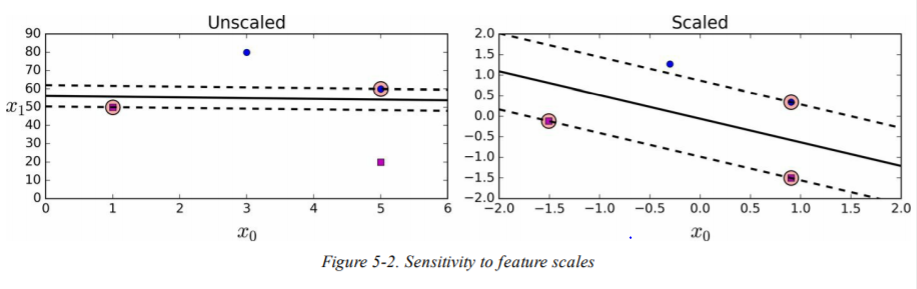   
> SVMs are sensitive to the feature scales(형상 척도)
>* left plot에서 볼수 있듯이 vericalscale(수직척도)는 항상 herizontalscale(수평척도)에 비해 훨씬 크다
>* so 가능한 가장 widest한 street은 horiziontal에 가깝다
>* 따라서 After feature scaling, decision boundary는 더 좋아보인다(right plot)

### #Soft Margin Classification
만약 우리가 all instance가 street에서 벗어나 오른쪽에 있도록 강요한다면, this is called *hard marginr classification*

* *hard magin classification*에는 두가지 주요 문제가 있다:
    1. data가 linearly separable한 경우에만 작동
    2. outlier에 상당히 민감   
    
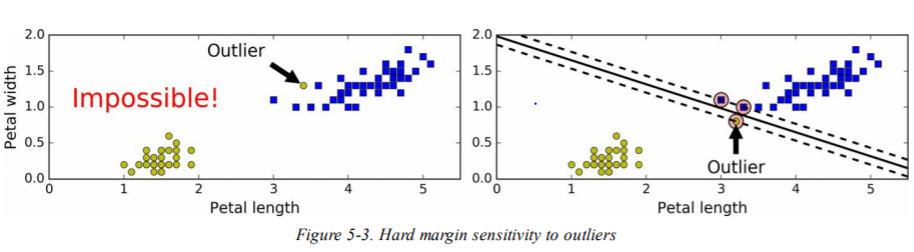    

* figure3는 one additional outlier를 가지는 iris dataset을 보여준다:
    - left: hard margin을 찾는 것이 불가능하다. 그러나,
    - right: outlier가 없는 figure1과 매우 다른 decision boundary를 가지며, t and it will probably not generalize as well
    

to avoid these issues it is preferable to use a more flexible model:   
- 가능한 street을 넓게 유지하는 것과 *margin violations(i.e., instance가 street 중앙에 위치하거나, 잘못된 쪽으로 끝나는 것)*을 제한하는 것이 목적이다.
- this is called **soft margine classification**

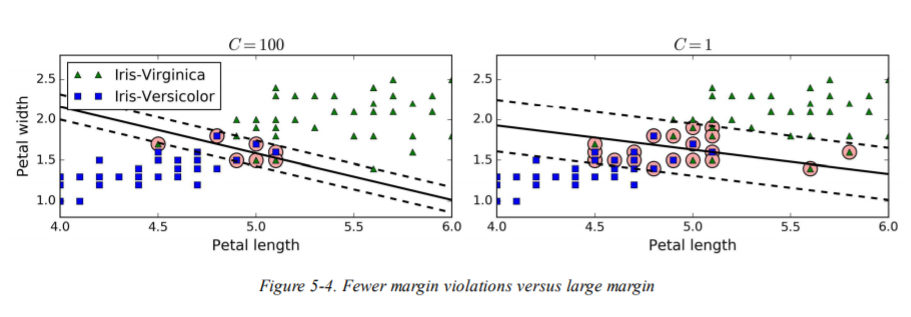

in Scikit-Learn's SVM classes, you can control this balance using the `c` hyperparameter:
- `c`value은 wider street를 이끌어내지만 더 많은 margin violation으로 이어진다.
- figure4는 nonlinearly separable한 dataset에 대한 두개의 soft margin SVM classifier의 decision boundaries and margins을 보인다
    + left: using a high `c` value, classifier가 margin violation을 적게하지만 결국 smaller margin을 갖는다
    + right : using a low `c` value,margin은 커지나 많은 instance들이 street에 포함된다

however, it seems likely that the second(right) classifier will genralize better: 
- on this training set, 실제로도 더 적은 prediction errors를 가진다
- 대부분의 margin violations은 실제로 decision boundary의 올바른 측면에 있기 때문이다

> **TIP**   
> IF your SVM model is overfitting, you can try regularizing it by reducing `c`


the following Scikit-Learn code:
1. lode the iris dataset
2. scales the feature
3. train a linear SVM model(using `LinearSVS`class with C=0.1 and the `hinge loss`function )
    - ro detect Iris-Virginica flower
    
**the resulting model is represented on the right of figure4**

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [3]:
X.shape

(150, 2)

In [4]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

> **NOTE**   
> Logistic Regression classifier와 달리, SVM classifier는 각 class에 대한 확률을 출력하지 않는다

1. 대안으로, `SVC(kernel="linear",C=1)`를 사용해 `svs`class를 사용할 수 있지만, 특히 large trainig set을 사용하는 경우 속도가 훨씬 느리기 때문에 권장하지 않는다.

2. Another option은 `SGDClassifier(loss="hinge", alpha=1/(m*C))`와 함께 `SGDClassifier`class를 사용하는 것이다.
    - 이것은 linear SVM classifier를 훈련하기 위해 regular Stochastic Gradient Descent를 적용한다
    - `LinearSVS`class만큼 빠르게 수렴되지는 않지만, huge dataset을 처리하거나 online classfication task을 처리하는 것이 유용할 수 있다

> **TIP**
> * `LinearSVC` class는 bias term을 정규화하므로, 평균을 빼서 training set의 중심을 잡아야한다.
> * `StandardScaler`을 사용해 data scaling을 하면 자동으로 평균을 뺀 중심을 잡을 수 있다.
> * `loss` hyperparameter는 기본값이 아니므로 `"hinge"`로 설정해야한다.
> * 마지막으로, 성능을 향상시키려면 training instance보다 더 많은 feature이 없는 한 `dual` hyperparameter를 `False`로 설정해야한다.

## 2.Nonlinear SVM Classification

비록 linear SVM classifier가 효율적이고 많은 경우 매우 잘 작동하지만, 많은 dataset은 lineary separable이 불가능하다.

* nonlinear dataset을 처리하는 한가지 접근방식은 **add more features**, such as polynomial features;
    - 경우에 따라 lineary separable dataset이 생성될 수 있음

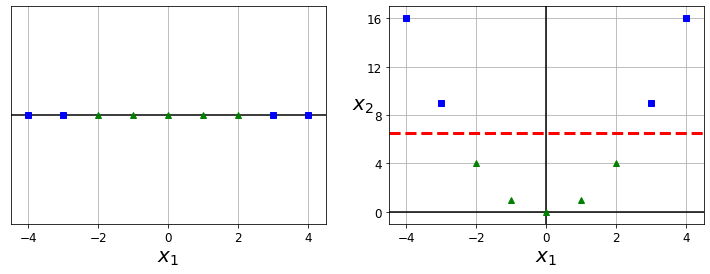

In [5]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()


* consider the left plot in figure5;
    - 하나의 feature x_1을 구성하는 simple dataset이다.
    - 이 dataset을 linearly separable하지 않다.
    - But second feature $x_2=(x_1)^2$을 추가하면, 결과 2D dataset은 완벽하게 선형적으로 구분할 수 있다.

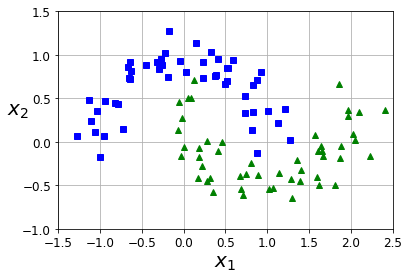

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [7]:
# Scikit-Learn을 통해 
# `PolynomialFeatures` Transformer을 포함하는 pipeline 생성
# followed by a `StandardScaler` and a `LinearSVC`

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\Users\whbom\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

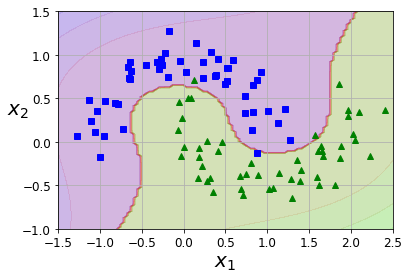

In [8]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


plt.show()

### 1) Polynomial Kernel

polynomial feature 추가는 구현이 간단하며 모든 종류의 ML algorithms에서 휼륭하게 작동할 수 있다.
* 그러나 low polynomial degree에서는 complex datasets을 다룰 수 없으며, 
* high polynomial degree에서는 엄청난 수의 feature을 생성해 model을 느리게 만든다

다행히, SVMs을 사용할 때 **kernel trick**이라는 기적적인 수학 기술을 적용할 수 있다.
* 많은 polynomial feature을 추가해야한다면, 실제로 그들을 추가할 필요없이 high-degree polynomial으로도 동일한 결과를 얻을 수 있다.
* 따라서 feature을 실제로 추가하는 것이 아니기 때문에 feature 수의 combinatorial explosion은 없다.

**this trick is implemented by `svc`class**


In [9]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [10]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

각각 code는 3-degree와 10-degree를 사용해 SVM classifier를 훈련시켰다. 
* model이 overfitting된다면, polynomial degree를 줄이는 것이 좋다
* Conversely, model이 underfitting된다면, 이를 늘려 볼 수 있다.
* hyper parameter `coef0`는 model이 high-dgree polynomial vs low-dgree polynomial의 영향을 받는 정도를 제어한다.

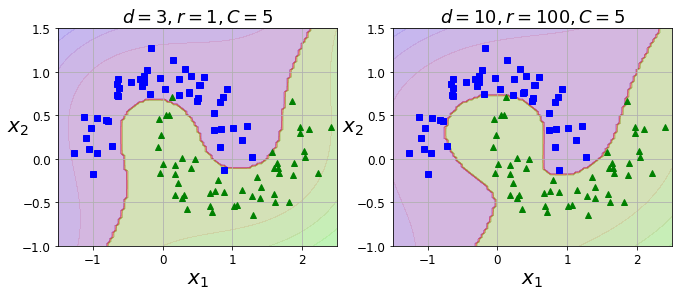

In [11]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

> **TIP**
>* 올바른 hyper parameter 값을 찾는 일반적인 접근법은 *grid search*을 사용하는 것이다.
    - grid search란?
        + 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도하여 최적의 매개변수를 찾는 방법
        + 매개변수를 튜닝하여 일반화 성능을 개선해줌
>* 만저 매우 coarse한 grid search를 한 후, 발견된 가장 좋은 값을 중심으로 더 finer한 gird search를 수행하는 것이 종종 더 빠르다
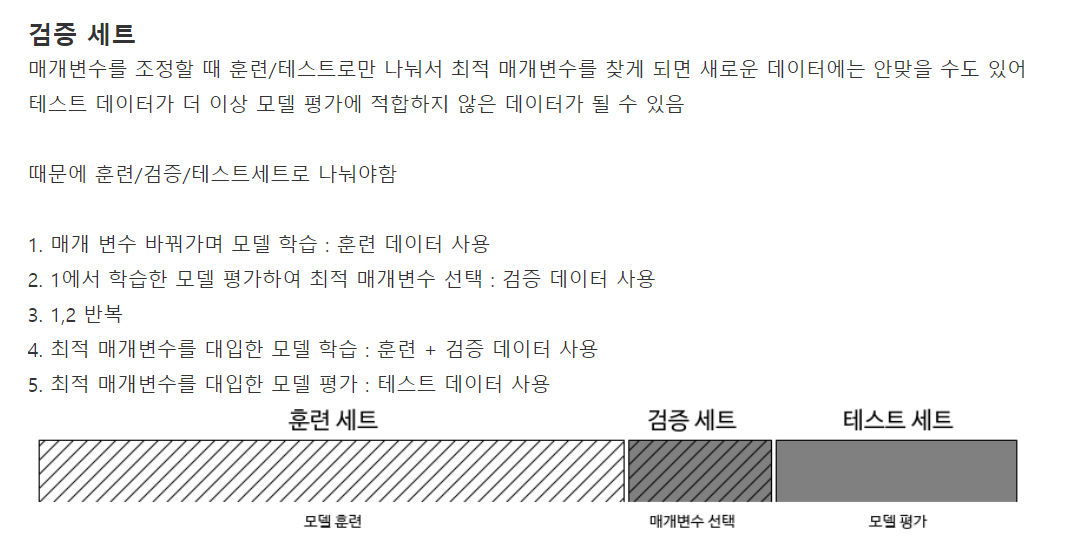    
    - 교차검증을 사용한 그리드 서치의 결과 분석
        + 교차검증을 사용한 그리드 서치는 시간이 매우 많이 들기 때문에 한번에 모든 범위를 검증하면 안됨!
        + 범위를 크게->좁게 하는 등 범위를 차근차근 조정해나가야함

>* 각 hyper parameter가 실제로 어떤 역할을 하는지 잘 파악하면 hyper parameter space의 right part를 검색하는 데도 도움이 될 수 있다.

### 2) Adding Similarity Features

* nonlinear 문제를 해결하기 위한 또 다른 기법은;   
    각 instance가 특정 *landmark*를 얼마나 닮았는지를 측정하는 *similarity function*를 사용하여 계산된 feature을 추가하는 것이다

>ex)   
>* 앞서 설명한 1차원 dataset을 취하여 x_1=-2 and x_1=1에서 두개의 landmark를 추가하자
>* 다음으로 similarity function를 γ =0.3의 Gaussian Radial Basis Function로 정의하자

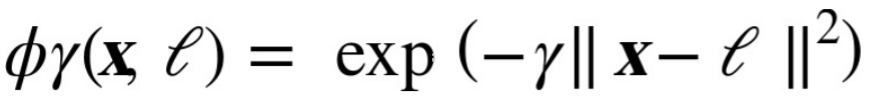

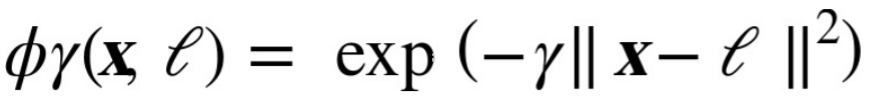

* 0(very far away from the landmark)부터 1(at the landmark)까지 다양한 bell-shaped function이다

now we are ready to compute the new feature.
- ex) let's look at the instance x_1=-1 :
    + it is located at a distance of 1 from the first landmark, and 2 from the sencond landmark
- therefore, new features are $x_2=exp(-0.3 * 1^2)=0.74$ and $x_3= exp(-0.3*2^2)=0.30$

figure8의 오른쪽에 있는 그림은 변환된 dataset을 보여준다(dropping the original features)   

now linearly separable

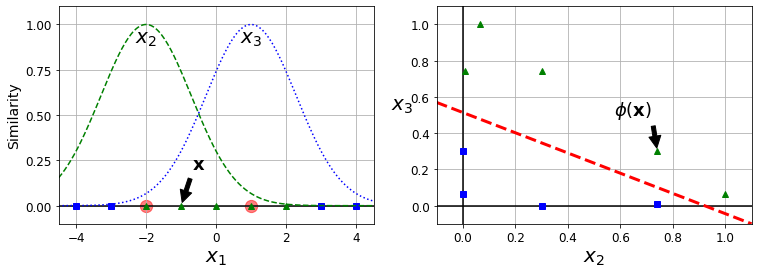

In [12]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

you may wonder how to select the landmark;

1. 가장 간단한 방법은 data set의 각 instance와 모든 instance의 위치에 landmark를 생성하는 것이다.
    * 많은 dimension이 생성되므로 변환된 training set가 linearly separble할 가능성이 증가한다 
    * 단점은 traing set with *m* instances and *n*feature이 trainig set with *m*instance and *m*features(original features을 삭제하는 경우)으로 전환된다는 점이다.
    
만약 training set이 매우 크다면, 당신은 동일한 수의 feature을 갖게 된다.

### 3) Gaussian RBF Kernel

polynomial features method와 마찬가지로 similarity features method는 모든 ML algorithm에서 유용할 수 있지만 large training set에서 모든 additionl feature을 계산하는 것은 비용이 많이 들 수 있다.   

however, once again the kernel trick does its SVM magic;   
* similarity feature을 많이 추가한 것 처럼, 실제로 추가할 필요 없이 similar result를 얻을 수 있게 한다

Let's try Gaussian RBF kernel using the `svc`class:

In [13]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [14]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

(이 code의 model은 figure9의 왼쪽 하단이다)
다른 plot은  hyper parameters `gamma` and `C`의 다른 값으로 훈련된 model을 보여준다.
* Increasing `gamma`: 
    - bell-shape curve가 좁아지고, 그 결과 각 instance의 influense가 작아진다.
    - decision boundary가 더 불규칙적이게 되고, 개별 instance 중심으로 흔들린다.

* conversely, a small `gamma` value:
    - bell-shaped curve가 넓어지고, so instances는 큰 influence를 가지게 된다.
    - decision boundary가 더 부드러워진다. 
    
**So γ acts like a regularization hyperparameter**:
* if your model is overfitting, you should reduce it, 
* and if it is underfitting, you should increase it

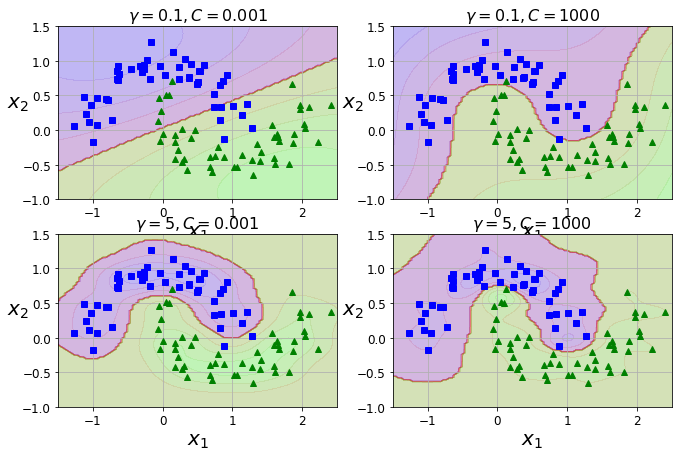

In [15]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

other kernels은 존재하지만 더 드물게 사용된다

ex) 일부 kernels은 특정 data structor에 특화되어 있다.
* *string kernels*은 text 문서나 DNA sequences를 분류할 때 가끔 사용된다.(e.g., Levenshtein distance을 기준으로 문자열 부분 kernel또는 kernels를 사용).

>**TIP**
> With so many kernel to choose from how can you decide which one to use?;
> * rule of thumb(경험의 법칙)에 따라, 항상 linear kernel을 먼저 시도해야 한다(**remember that `LinearSVC` is much faster than `SVC(kernel="linear")`**),
    - 특히 training set이 매우 크거나 많은 feature을 가진다면
> * 시간적 여유와 계산력이 있다면, cross-validation과 grid search를 사용해 몇개의 다른 kernel로 실험할 수 있다.
    - 특히 training set의 data structure에 특화된 kernel이 있다면

### 4) Computation Complexity

`LinearSVC` class는 *liblinear* library를 기반으로 하며, 이 library는 linear SVMs에 최적화된 알고리즘을 구현한다.
* kernel trick을 지원하지는 않지만, training instance 수와 feature 수에 따라 거의 linearly하게 확장된다;
    - its trainig time complexity is roughltly O(m*n)

the algorithm takes longer if you require a vety high precision.
this is controlled by the toleraance hyperparameter ϵ (called `tol` in Scikit-Learn). in most classification tasks, the default tolerance is fine.

the `SVC` class is based on the *libsvm* library, which implements an algorithm that support the kernel trick.
the training time complexity is usually between O($m^2*n$) and O($m^3*n$)
Unfortunately, this means that it gets dreadfully slow when the number of training instances get large(e.g. hundreds of thousands of instances)
this algotithm is perfect for complex but small or medium training sets

however, it scales well with the number of features, especially with *sparse features* (i.e., when each instance has few nonzero features)
in this case, the algorithm scales roughly with the average number of nonzero features per instance

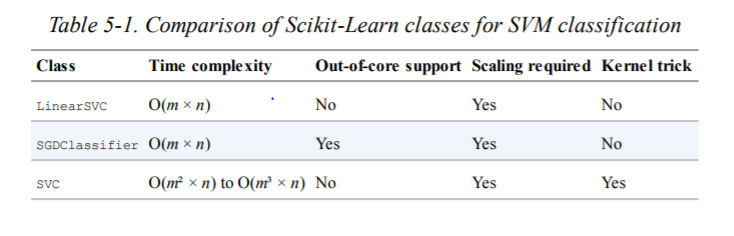

## 3. SVM Regression

## 4. Under the Hood

### 1) Decision Function and Prediction

### 2)Training Objective

### 3) Quadratic Programming

### 4)The Dual Problem

### 5) Kernelized SVM

### 6) Online SVMs